Vamos começar obtendo os dados para análise. 
Nós acrescentamos uma classe chamada "mais_atropelada" e atribuimos 1 para o anfibio mais atropelado e 0 para todos os demais. 

In [7]:
import pandas as pd

# seleciona os dados do arquivos
# data frame (df) - molde de dados
dados = pd.read_csv('CSV_Mamíferos_Cortada.csv')
dados.head()



,Mês,Estação,Trecho,Sentido,Trecho macro,Tipo De Pistas,Numero de Pistas,Tipo de Pavimento,Numero de Faixas,Velocidade Maxima,...,Agua?,Vegetação Baixa?,capimAlto,Arbustos,Floresta,Local,Com filhotes?,Faixa Horário da Coleta,Faixa de Quilometragem,É mamífero mais atropelado
0,4,Outono,2,JF,Baixada,Sem divisão,1,Pavimento flexível (asfalto),4,110,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 00 e 06,Entre 100 e 125,0
1,4,Outono,4,JF,Serra,Sem divisão,1,Pavimento rígido,2,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Pista de rolamento,Desconhecido,Entre 06 e 12,Entre 75 e 100,0
2,5,Outono,5,JF,Serra,Sem divisão,1,Pavimento semi-flexível,2,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Entre 12 e 18,Entre 75 e 100,0
3,6,Outono,7,RJ,Planalto,Defensa Metálica,2,Pavimento flexível (asfalto),4,60,...,sim,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acostamento,Desconhecido,Entre 06 e 12,Entre 50 e 75,0
4,6,Outono,3,RJ,Serra,Defensa Metálica,2,Pavimento flexível (asfalto),4,80,...,não,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Acesso/ Retorno,Desconhecido,Entre 12 e 18,Entre 100 e 125,0


Agora vamos separar os atributos a serem estudados da classe a ser prevista. 

In [10]:
Y_df = dados['É mamífero mais atropelado']  
X_df = dados[["Mês", "Estação", 
              "Trecho", "Sentido", "Trecho macro",
              "Tipo De Pistas", "Numero de Pistas",
              "Tipo de Pavimento", "Numero de Faixas",
              "Velocidade Maxima", "Tipo da Chuva","Intervencao",
              "Vazamento", "Agua?", "Vegetação Baixa?","capimAlto",
              "Arbustos","Floresta","Local","Com filhotes?",
              "Faixa Horário da Coleta","Faixa de Quilometragem"]]

features = ["Mês", "Estação", 
              "Trecho", "Sentido", "Trecho macro",
              "Tipo De Pistas", "Numero de Pistas",
              "Tipo de Pavimento", "Numero de Faixas",
              "Velocidade Maxima", "Tipo da Chuva","Intervencao",
              "Vazamento", "Agua?", "Vegetação Baixa?","capimAlto",
              "Arbustos","Floresta","Local","Com filhotes?",
              "Faixa Horário da Coleta","Faixa de Quilometragem"]

Podemos analisar qual a proporção de atropelados para não atropelados.

In [11]:
Y_df.value_counts()

0    11420
1     1676
Name: É mamífero mais atropelado, dtype: int64

In [12]:
#  Transformando em um array 
x = X_df.values
y = Y_df.values

Agora vamos preparar para o modelo, dividindo os dados para teste e para treino:

In [13]:
# divide os dados 2/3 treino, 1/3 teste
porcentagem_treino = 0.67
porcentagem_teste  = 0.33

tamanho_treino    = int(porcentagem_treino * len(y))
tamanho_teste     = int(porcentagem_teste * len(y))

# 0 ate 67% -> treino
treino_x = x[0:tamanho_treino]
treino_y = y[0:tamanho_treino]

# 67 ate 100% - teste
teste_x = x[tamanho_treino:]
teste_y = y[tamanho_treino:]




Vamos criar uma função que treina o modelo, faz as previsoes e retorna a taxa de acerto

In [14]:
def fit_predict_model(nome, modelo):
    # treina modelo
    modelo.fit(treino_x, treino_y)
    
    # testa modelo
    teste = modelo.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
    acertos = teste == teste_y # Verifica se o modelo acertou

    total_de_acertos = sum(acertos)
    total_de_elementos = len(teste_x)

    taxa_de_acerto = 100.0 * total_de_acertos / total_de_elementos

    msg = "A taxa de acerto do {} foi: {:.2f}%".format(nome, taxa_de_acerto)
    print(msg)

    return taxa_de_acerto

O Naive Bayes possui alguns tipos de algoritmos diferentes, vamos testar qual é o melhor.
Vamos importar os modelos e chamar a função para cada um deles. 

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

modelo_multinomial = MultinomialNB ()
resultado_multinomial = fit_predict_model("Multinomial", modelo_multinomial)

modelo_gaussiano = GaussianNB ()
resultado_gaussiano = fit_predict_model("gaussiano", modelo_gaussiano)

modelo_bernoulli = BernoulliNB ()
resultado_bernoulli = fit_predict_model("bernoulli", modelo_bernoulli)

ValueError: could not convert string to float: 'Outono'

Ele nos retorna um erro, pois o Naive bayes só aceita variaveis numéricas, e possuimos muitas variaveis categóricas. Será necessário transformar cada uma delas em diferentes classes. Nossa sorte é que já existe um algoritmo que faz isso:

In [16]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X_df.apply(LabelEncoder().fit_transform)
 
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Mês                      13096 non-null  int64
 1   Estação                  13096 non-null  int32
 2   Trecho                   13096 non-null  int64
 3   Sentido                  13096 non-null  int32
 4   Trecho macro             13096 non-null  int32
 5   Tipo De Pistas           13096 non-null  int32
 6   Numero de Pistas         13096 non-null  int32
 7   Tipo de Pavimento        13096 non-null  int32
 8   Numero de Faixas         13096 non-null  int32
 9   Velocidade Maxima        13096 non-null  int32
 10  Tipo da Chuva            13096 non-null  int32
 11  Intervencao              13096 non-null  int32
 12  Vazamento                13096 non-null  int32
 13  Agua?                    13096 non-null  int32
 14  Vegetação Baixa?         13096 non-null  int32
 15  ca

In [17]:
# Redefinindo os valores de x 
x = X_encoded.values
y = Y_df.values 

# divide os dados 2/3 treino, 1/3 teste  
porcentagem_treino = 0.67
porcentagem_teste  = 0.33

tamanho_treino    = int(porcentagem_treino * len(y))
tamanho_teste     = int(porcentagem_teste * len(y))

# 0 ate 60% -> treino
treino_x = x[0:tamanho_treino]
treino_y = y[0:tamanho_treino]

# 60 ate 90% - teste
teste_x = x[tamanho_treino:]
teste_y = y[tamanho_treino:]

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

modelo_multinomial = MultinomialNB ()
resultado_multinomial = fit_predict_model("Multinomial", modelo_multinomial)

modelo_gaussiano = GaussianNB ()
resultado_gaussiano = fit_predict_model("gaussiano", modelo_gaussiano)

modelo_bernoulli = BernoulliNB ()
resultado_bernoulli = fit_predict_model("bernoulli", modelo_bernoulli)

A taxa de acerto do Multinomial foi: 83.48%
A taxa de acerto do gaussiano foi: 82.32%
A taxa de acerto do bernoulli foi: 76.56%


Podemos observar que o Modelo Multinomial teve o melhor desempenho.
Até agora estamos separando o modelo de forma sequencial, para melhorar o resultado, podemos separá-lo de forma aleatória e mantendo a proporção de respostas positivas e negativas.

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.33,
                                                         stratify = y)


Aplicando novamente no modelo:

In [19]:
modelo_multinomial = MultinomialNB ()
resultado_multinomial = fit_predict_model("Multinomial", modelo_multinomial)

modelo_gaussiano = GaussianNB ()
resultado_gaussiano = fit_predict_model("gaussiano", modelo_gaussiano)

modelo_bernoulli = BernoulliNB ()
resultado_bernoulli = fit_predict_model("bernoulli", modelo_bernoulli)

A taxa de acerto do Multinomial foi: 77.93%
A taxa de acerto do gaussiano foi: 74.64%
A taxa de acerto do bernoulli foi: 87.04%


Vamos analisar esses resultados.

Aqui analisamos a acurácia, que mede a taxa de acerto em relação ao total de elementos.

A precisão, que é a razão tp / (tp + fp) onde tp é o número de verdadeiros positivos e fp o número de falsos positivos. A precisão é intuitivamente a capacidade do classificador não rotular como positiva uma amostra que é negativa. O melhor valor é 1 e o pior valor é 0.
A matriz de confusão que mostra explicitamente quantos o algoritmo acertou e errou das classes 1 e 0.


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

def testeQualidade(nome, modelo):
    # treina modelo
    modelo.fit(treino_x, treino_y)

    # testa modelo
    y_predict = modelo.predict(teste_x) # Pega as previsoes do modelo para os valores X de teste
    y_true = teste_y
    
    print("Para o modelo ", nome, ":")

    acuracia = accuracy_score(y_true, y_predict)
    msg_acuracia = "A acuracia foi de {:.2f}%".format(acuracia*100)
    print(msg_acuracia)

    print("Precisão do modelo")
    y_score = modelo.fit(treino_x, treino_y).predict_proba(teste_x)
    # print(y_score)
    precision = precision_score(y_true, y_predict, average='weighted', zero_division=1)
    print(precision)
    
        
    print("Matriz de confusão")
    matriz_confusao = confusion_matrix(y_true, y_predict)
    matriz = ConfusionMatrixDisplay(matriz_confusao)
    matriz.plot()
    plt.show()
    



Para o modelo  Multinomial :
A acuracia foi de 77.93%
Precisão do modelo
0.8333151230425252
Matriz de confusão


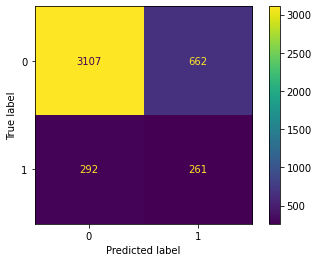

Para o modelo  gaussiano :
A acuracia foi de 74.64%
Precisão do modelo
0.8331145529140298
Matriz de confusão


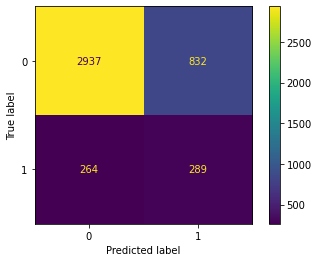

Para o modelo  bernoulli :
A acuracia foi de 87.04%
Precisão do modelo
0.7838546665512454
Matriz de confusão


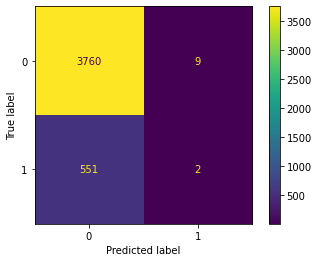

In [23]:
metricas_multinomial = testeQualidade("Multinomial", modelo_multinomial)

metricas_gaussiano = testeQualidade("gaussiano", modelo_gaussiano)

metricas_bernoulli = testeQualidade("bernoulli", modelo_bernoulli)

Queremos também saber quais são as variaveis preditoras mais relevantes no nosso modelo, e qual a correlação entre elas.

Matriz de correlação:


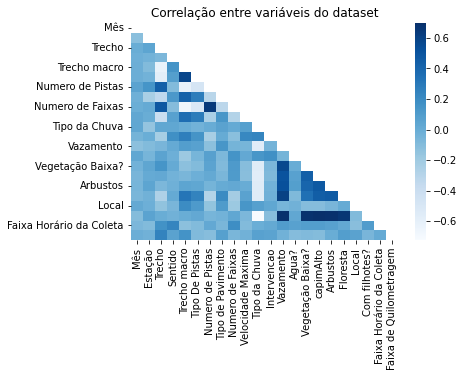

1. Local (0.004489)
2. Trecho macro (0.000278)
3. Intervencao (0.000185)
4. Estação (0.000093)
5. Com filhotes? (0.000046)
6. Arbustos (0.000000)
7. Tipo de Pavimento (-0.000046)
8. Tipo da Chuva (-0.000093)
9. Agua? (-0.000139)
10. Vazamento (-0.000139)
11. Vegetação Baixa? (-0.000324)
12. Sentido (-0.000370)
13. Mês (-0.000416)
14. Floresta (-0.000509)
15. Numero de Pistas (-0.000555)
16. Faixa de Quilometragem (-0.000602)
17. Faixa Horário da Coleta (-0.000740)
18. capimAlto (-0.001018)
19. Tipo De Pistas (-0.003332)
20. Numero de Faixas (-0.003563)
21. Trecho (-0.008468)
22. Velocidade Maxima (-0.009995)


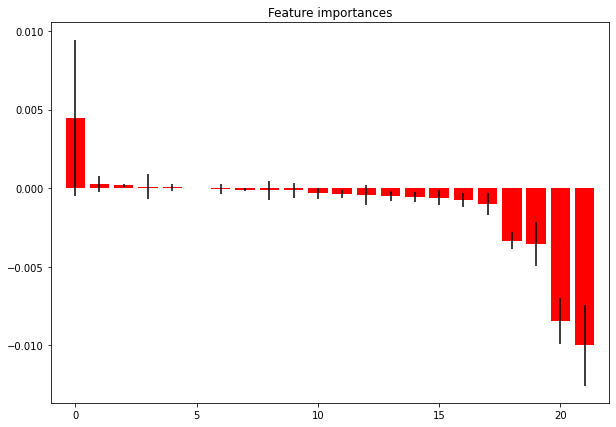

In [22]:
from sklearn.inspection import permutation_importance


print("Matriz de correlação:")
mask = np.triu(np.ones_like(X_encoded.corr()))
sns.heatmap(X_encoded.corr(),
            mask=mask,
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

imps = permutation_importance(modelo_multinomial, teste_x, teste_y)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

for f in range(teste_x.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
    
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(teste_x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
# plt.xticks(range(teste_x.shape[1]), [features[indices[i]] for i in range(6)])
plt.xlim([-1, teste_x.shape[1]])
plt.show()
    

Referências

https://blog.ineuron.ai/Feature-Importance-in-Naive-Bayes-Classifiers-5qob5d5sFW

https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn